<a href="https://colab.research.google.com/github/mgultekin/Building-Generative-AI-Applications-with-Gradio/blob/main/ImageCaptioningApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Segmentation App


https://huggingface.co/docs/transformers.js/en/pipelines#pipeline-options

In [2]:
# Install necessary packages

!pip install gradio
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [3]:
import os
import io
import IPython
from IPython.display import Image, display, HTML
from PIL import Image
import base64



In [4]:
# Example to use the 'transformers' library for text classificationfrom transformers import pipeline
from transformers import pipeline
pipe = pipeline('image-segmentation',model='facebook/maskformer-swin-base-coco')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/411M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: FutureWarning: `max_size` is deprecated and removed starting from version 4.27.0 for `MaskFormerImageProcessor.__init__`.
  return func(*args, **kwargs)


In [5]:
# Sample image URL for demonstration
image_url = "https://free-images.com/lg/0b0f/tennis_player_caroline_wozniacki.jpg"
display(IPython.display.Image(url=image_url))

In [6]:

from PIL import Image,ImageDraw
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
# Load an image from a URL
#image_url = "https://example.com/path/to/your/image.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))



In [7]:
# Perform object detection
results = pipe(image)

`label_ids_to_fuse` unset. No instance will be fused.


In [8]:
results

[{'score': 0.966649,
  'label': 'banner',
  'mask': <PIL.Image.Image image mode=L size=683x1024>},
 {'score': 0.999879,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=683x1024>},
 {'score': 0.999913,
  'label': 'tennis racket',
  'mask': <PIL.Image.Image image mode=L size=683x1024>},
 {'score': 0.999915,
  'label': 'sports ball',
  'mask': <PIL.Image.Image image mode=L size=683x1024>},
 {'score': 0.930393,
  'label': 'playingfield',
  'mask': <PIL.Image.Image image mode=L size=683x1024>}]

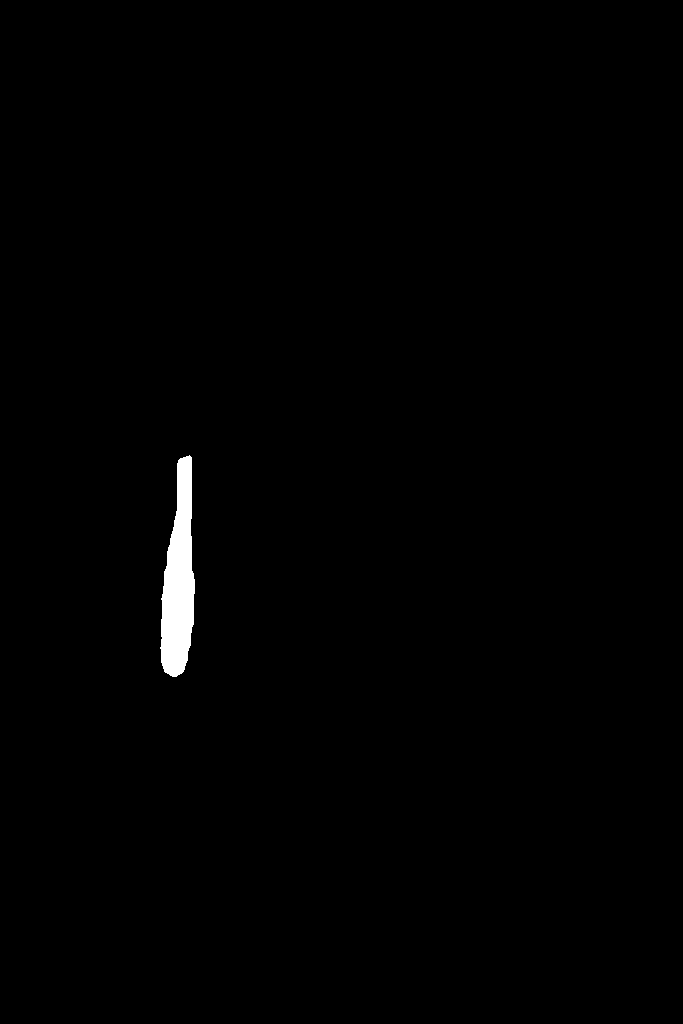

In [9]:

results[2]['mask']

#Gradio Interface

In [10]:

# Function to convert PIL image to base64 string
#def image_to_base64_str(pil_image):
#    byte_arr = io.BytesIO()
#    pil_image.save(byte_arr, format='PNG')
#    byte_arr = byte_arr.getvalue()
#    return str(base64.b64encode(byte_arr).decode('utf-8'))

def detect(image):
    #base64_image = image_to_base64_str(image)
    results = pipe(image)
    return [(result['mask'], f"Label: {result['label']}") for result in results]

In [12]:
# Create a Gradio interface to interactively demonstrate the image captioning functionality
import gradio as gr


gr.close_all()
demo = gr.Interface(fn=detect,
                    inputs=[gr.Image(label="Upload image", type="pil")],
                    outputs=[gr.Gallery(label="Segmented images")],
                    title="Semantic Segmentation",
                    description="Semantic Segmentation model demo",
                    allow_flagging="never")

demo.launch(share=True)

Closing server running on port: 7860
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9943280b0c76e87c97.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# Close all Gradio interfaces after launching the demo
gr.close_all()

Closing server running on port: 7860
